## Importación de Librerías

In [317]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import set_config
import multiprocessing

# Importar las bibliotecas necesarias
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## Cargue y Limpieza de los Datos

In [318]:
data_cruda = pd.read_csv('Produccion_Frutales_Valle_del_Cauca.csv', sep=';')

In [319]:
data_cruda

,Municipios,Producto,Cantidad,Año
0,Cali,Aguacate,458,2019
1,Cali,Banano,1097,2018
2,Cali,Bananito,519,2021
3,Cali,Borojó,539,2018
4,Cali,Cítricos,1215,2021
...,...,...,...,...
919,Zarzal,Papaya,1465,2018
920,Zarzal,Piña,905,2017
921,Zarzal,Pitaya,1319,2016
922,Zarzal,Tomate Arbol,648,2021


In [320]:
type(data_cruda)

pandas.core.frame.DataFrame

In [321]:
len(data_cruda)

924

In [322]:
data_cruda.columns #las columnas

Index(['Municipios', 'Producto', 'Cantidad', 'Año'], dtype='object')

In [323]:
data_cruda.shape # se muestra el numero y filas y columnas del daset

(924, 4)

In [324]:
data_cruda['Municipios'].value_counts()

Municipios
Cali             22
San Pedro        22
La Unión         22
La Victoria      22
Obando           22
Palmira          22
Pradera          22
Restrepo         22
Riofrio          22
Roldanillo       22
Sevilla          22
Alcalá           22
Toro             22
Trujillo         22
Tuluá            22
Ulloa            22
Versalles        22
Vijes            22
Yotoco           22
Yumbo            22
La Cumbre        22
Jamundí          22
Guacarí          22
Ginebra          22
Andalucia        22
Ansermanuevo     22
Argelia          22
Bolivar          22
Buenaventura     22
Buga             22
Bugalagrande     22
Caicedonia       22
Calima Darién    22
Candelaria       22
Cartago          22
Dagua            22
El Aguila        22
El Cairo         22
El Cerrito       22
El Dovio         22
Florida          22
Zarzal           22
Name: count, dtype: int64

In [325]:
data_cruda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Municipios  924 non-null    object
 1   Producto    924 non-null    object
 2   Cantidad    924 non-null    int64 
 3   Año         924 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 29.0+ KB


In [326]:
data_cruda.dropna(inplace=True) ## elimina las filas faltantes y sobre escribe las filas originales

In [327]:
data_cruda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Municipios  924 non-null    object
 1   Producto    924 non-null    object
 2   Cantidad    924 non-null    int64 
 3   Año         924 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 29.0+ KB


In [328]:
data_cruda.describe()

,Cantidad,Año
count,924.000000,924.000000
mean,1146.573593,2018.711039
std,670.948671,1.695654
min,2.000000,2016.000000
25%,553.500000,2017.000000
50%,1120.000000,2019.000000
75%,1745.250000,2020.000000
max,2340.000000,2021.000000


In [329]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data_cruda.shape}')
data_cruda.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data_cruda.shape}')

Tamaño del set antes de eliminar las filas repetidas: (924, 4)
Tamaño del set después de eliminar las filas repetidas: (924, 4)


In [330]:



data_cruda = data_cruda.astype({'Cantidad': 'float'})



In [331]:
data_cruda

,Municipios,Producto,Cantidad,Año
0,Cali,Aguacate,458.0,2019
1,Cali,Banano,1097.0,2018
2,Cali,Bananito,519.0,2021
3,Cali,Borojó,539.0,2018
4,Cali,Cítricos,1215.0,2021
...,...,...,...,...
919,Zarzal,Papaya,1465.0,2018
920,Zarzal,Piña,905.0,2017
921,Zarzal,Pitaya,1319.0,2016
922,Zarzal,Tomate Arbol,648.0,2021


In [332]:
data_pura  = data_cruda
data_pura


,Municipios,Producto,Cantidad,Año
0,Cali,Aguacate,458.0,2019
1,Cali,Banano,1097.0,2018
2,Cali,Bananito,519.0,2021
3,Cali,Borojó,539.0,2018
4,Cali,Cítricos,1215.0,2021
...,...,...,...,...
919,Zarzal,Papaya,1465.0,2018
920,Zarzal,Piña,905.0,2017
921,Zarzal,Pitaya,1319.0,2016
922,Zarzal,Tomate Arbol,648.0,2021


## REGRESIÓN LINEAL 

In [333]:
data_pura_regresion = data_pura
data_pura_regresion

,Municipios,Producto,Cantidad,Año
0,Cali,Aguacate,458.0,2019
1,Cali,Banano,1097.0,2018
2,Cali,Bananito,519.0,2021
3,Cali,Borojó,539.0,2018
4,Cali,Cítricos,1215.0,2021
...,...,...,...,...
919,Zarzal,Papaya,1465.0,2018
920,Zarzal,Piña,905.0,2017
921,Zarzal,Pitaya,1319.0,2016
922,Zarzal,Tomate Arbol,648.0,2021


<BarContainer object of 924 artists>

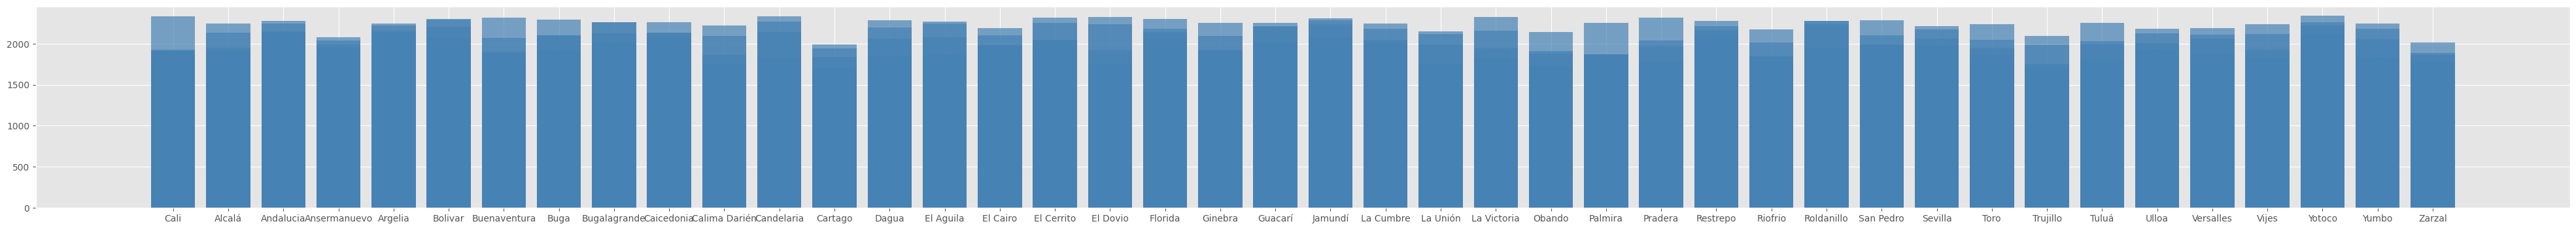

In [334]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(50, 4))
ax.bar(
    x    = data_pura_regresion['Municipios'],
    height = data_pura_regresion['Cantidad'],
    color   = 'steelblue',
    alpha   = 0.7,
    align   = 'center'
)

In [335]:
X = data_pura_regresion[['Año']]
y = data_pura_regresion['Cantidad']

In [336]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [337]:
y_pred = model.predict(X)

In [338]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 449334.7485036374
R-squared: 0.0007787039093249959


In [339]:
# División de los datos en train y test
# ==============================================================================


X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )



In [340]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = data_pura_regresion['Año'], y =  data_pura_regresion['Cantidad'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.02790526669510239
P-value:  0.3968483060207892


In [341]:
# División de los datos en train y test
# ==============================================================================
X = data_pura_regresion[['Año']]
y = data_pura_regresion['Cantidad']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )



In [342]:
# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [343]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [7362.36234547]
Coeficiente: [('Año', -3.075558245776105)]
Coeficiente de determinación R^2: -0.0006071165315719718


In [344]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[1162.03692199]
 [1152.81024725]
 [1146.65913076]]

El error (rmse) de test es: 687.6540840771116


In [345]:
# División de los datos en train y test
# ==============================================================================
X = data_pura_regresion[['Año']]
y = data_pura_regresion['Cantidad']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [346]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.04467
Date:                Thu, 08 Jun 2023   Prob (F-statistic):              0.833
Time:                        21:28:49   Log-Likelihood:                -5853.6
No. Observations:                 739   AIC:                         1.171e+04
Df Residuals:                     737   BIC:                         1.172e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7362.3623   2.94e+04      0.251      0.8

In [347]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

array([[-5.03054419e+04,  6.50301666e+04],
       [-3.16424714e+01,  2.54913549e+01]])

In [348]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1146.659131,41.607303,1064.976173,1228.342089,-166.124096,2459.442358
1,1152.810247,24.957954,1103.813092,1201.807402,-158.345127,2463.965622
2,1155.885805,26.532720,1103.797087,1207.974524,-155.388738,2467.160349
3,1158.961364,34.764220,1090.712664,1227.210064,-153.054482,2470.977210


In [349]:
X_train[:,0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [350]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 0]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,x,y
0,1146.659131,41.607303,1064.976173,1228.342089,-166.124096,2459.442358,1.0,634.0
487,1155.885805,26.532720,1103.797087,1207.974524,-155.388738,2467.160349,1.0,1672.0
488,1158.961364,34.764220,1090.712664,1227.210064,-153.054482,2470.977210,1.0,103.0
489,1155.885805,26.532720,1103.797087,1207.974524,-155.388738,2467.160349,1.0,2239.0


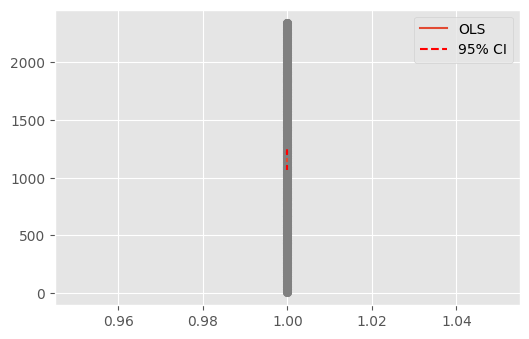

In [351]:

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

In [352]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 687.6540840771041


## CLASIFICACIÓN POR ARBOLES DE DESICIÓN 

In [353]:
data_pura_clasificacion = data_pura
data_pura_clasificacion

,Municipios,Producto,Cantidad,Año
0,Cali,Aguacate,458.0,2019
1,Cali,Banano,1097.0,2018
2,Cali,Bananito,519.0,2021
3,Cali,Borojó,539.0,2018
4,Cali,Cítricos,1215.0,2021
...,...,...,...,...
919,Zarzal,Papaya,1465.0,2018
920,Zarzal,Piña,905.0,2017
921,Zarzal,Pitaya,1319.0,2016
922,Zarzal,Tomate Arbol,648.0,2021


In [354]:

data_pura_clasificacion['cantidades_altas'] = np.where(data_pura_clasificacion.Cantidad > 8, 0, 1)
# Una vez creada la nueva variable respuesta se descarta la original
data_pura_clasificacion = data_pura_clasificacion.drop(columns = 'Cantidad')

In [355]:
data_pura_clasificacion

,Municipios,Producto,Año,cantidades_altas
0,Cali,Aguacate,2019,0
1,Cali,Banano,2018,0
2,Cali,Bananito,2021,0
3,Cali,Borojó,2018,0
4,Cali,Cítricos,2021,0
...,...,...,...,...
919,Zarzal,Papaya,2018,0
920,Zarzal,Piña,2017,0
921,Zarzal,Pitaya,2016,0
922,Zarzal,Tomate Arbol,2021,0


In [356]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        data_pura_clasificacion.drop(columns = 'cantidades_altas'),
                                        data_pura_clasificacion['cantidades_altas'],
                                        random_state = 123
                                    )

# One-hot-encoding de las variables categóricas
# ------------------------------------------------------------------------------
# Se identifica el nobre de las columnas numéricas y categóricas
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()

# Se aplica one-hot-encoding solo a las columnas categóricas
preprocessor = ColumnTransformer(
                    [('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                    remainder='passthrough'
               )

# Una vez que se ha definido el objeto ColumnTransformer, con el método fit()
# se aprenden las transformaciones con los datos de entrenamiento y se aplican a
# los dos conjuntos con transform(). Ambas operaciones a la vez con fit_transform().
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [357]:
preprocessor.named_transformers_['onehot']

OneHotEncoder(handle_unknown='ignore')

In [358]:
# Convertir el output del ColumnTransformer en dataframe y añadir el nombre de las columnas
# ------------------------------------------------------------------------------
# Nombre de todas las columnas
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])

# Conversión a dataframe
X_train_prep = pd.DataFrame(X_train_prep, columns=labels)
X_test_prep  = pd.DataFrame(X_test_prep, columns=labels)
X_train_prep.info()

AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names'

## CLUSTERING

In [ ]:
data_pura_clustering = data_pura
data_pura_clustering.head(4)

,Municipios,Producto,Cantidad,Año,cantidades_altas
0,Cali,Aguacate,458.0,2019,0
1,Cali,Banano,1097.0,2018,0
2,Cali,Bananito,519.0,2021,0
3,Cali,Borojó,539.0,2018,0


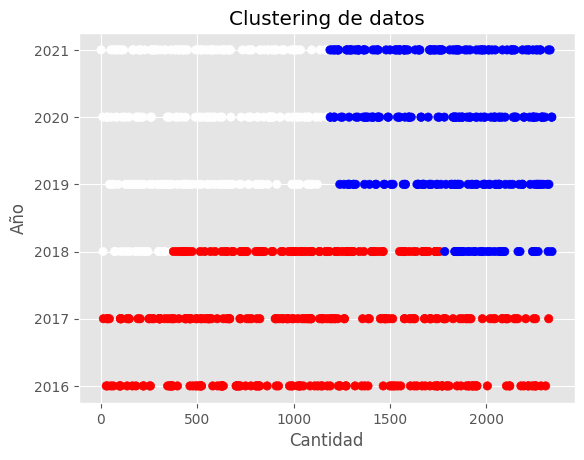

Cluster 1 - Tamaño: 285, Centroide: [1803.59298246 2019.82807018]
Cluster 2 - Tamaño: 283, Centroide: [ 545.15957447 2019.86524823]
Cluster 3 - Tamaño: 356, Centroide: [1097.12885154 2016.90756303]


Cantidad                                                             \
           count         mean         std     min      25%     50%      75%   
Cluster                                                                       
0          285.0  1803.592982  324.816247  1189.0  1549.00  1845.0  2063.00   
1          283.0   544.530035  327.744314     2.0   263.00   519.0   827.00   
2          356.0  1099.179775  602.464031    14.0   601.25  1076.5  1600.25   

                   Año               ... cantidades_altas      cluster  \
            max  count         mean  ...              75%  max   count   
Cluster                              ...                                 
0        2340.0  285.0  2019.828070  ...              0.0  0.0   285.0   
1        1178.0  283.0  2019.858657  ...              0.0  1.0   283.0   
2        2323.0  356.0  2016.904494  ...              0.0  0.0   356.0   

                                                      
             mean       std  min  25%  50%  75%  max  
Cluster                                               
0        1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
1        0.017668  0.131974  0.0  0.0  0.0  0.0  1.0  
2        1.907303  0.389803  0.0  2.0  2.0  2.0  2.0  

[3 rows x 32 columns]

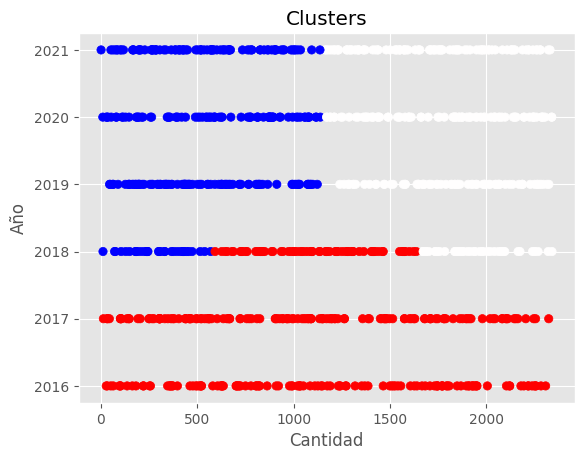

Cantidad                                                           \
           count         mean         std     min     25%     50%     75%   
cluster                                                                     
0          290.0   530.062069  313.474959     2.0   264.0   502.5   809.5   
1          299.0  1790.180602  327.685796  1163.0  1542.5  1836.0  2047.5   
2          335.0  1105.826866  600.586435    14.0   633.5  1086.0  1575.0   

                   Año               ... cantidades_altas      Cluster  \
            max  count         mean  ...              75%  max   count   
cluster                              ...                                 
0        1139.0  290.0  2019.768966  ...              0.0  1.0   290.0   
1        2340.0  299.0  2019.785953  ...              0.0  0.0   299.0   
2        2323.0  335.0  2016.835821  ...              0.0  0.0   335.0   

                                                      
             mean       std  min  25%  50%  75%  max  
cluster                                               
0        1.041379  0.199510  1.0  1.0  1.0  1.0  2.0  
1        0.076923  0.362832  0.0  0.0  0.0  0.0  2.0  
2        2.000000  0.000000  2.0  2.0  2.0  2.0  2.0  

[3 rows x 32 columns]

In [ ]:
X = data_pura_clustering[['Año', 'Cantidad']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 3  # Número de clusters que deseas encontrar
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_scaled)

labels = kmeans.labels_
data_pura_clustering['cluster'] = labels

plt.scatter(data_pura_clustering['Cantidad'], data_pura_clustering['Año'], c=labels)
plt.xlabel('Cantidad')
plt.ylabel('Año')
plt.title('Clusters')
plt.show()

centroids = kmeans.cluster_centers_

data_pura_clustering.groupby('cluster').describe()



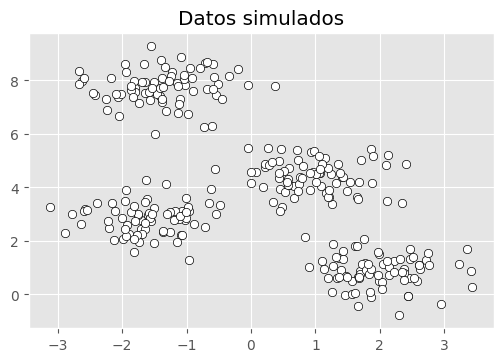

In [ ]:
# Simulación de datos
# ==============================================================================
X, y = make_blobs(
        n_samples    = 300, 
        n_features   = 2, 
        centers      = 4, 
        cluster_std  = 0.60, 
        shuffle      = True, 
        random_state = 0
       )

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.scatter(
    x = X[:, 0],
    y = X[:, 1], 
    c = 'white',
    marker    = 'o',
    edgecolor = 'black', 
)
ax.set_title('Datos simulados');

In [ ]:
# Escalado de datos
# ==============================================================================
X_scaled = scale(X)

In [ ]:
# Modelo
# ==============================================================================
X_scaled = scale(X)
modelo_kmeans = KMeans(n_clusters=4, n_init=25, random_state=123)
modelo_kmeans.fit(X=X_scaled)

KMeans(n_clusters=4, n_init=25, random_state=123)

In [ ]:
# Clasificación con el modelo kmeans
# ==============================================================================
y_predict = modelo_kmeans.predict(X=X_scaled)

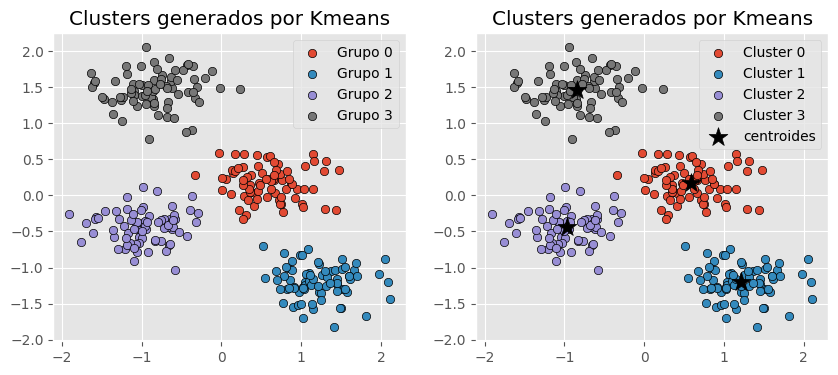

In [ ]:
# Representación gráfica: grupos originales vs clusters creados
# ==============================================================================
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Grupos originales
for i in np.unique(y):
    ax[0].scatter(
        x = X_scaled[y == i, 0],
        y = X_scaled[y == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Grupo {i}"
    )
    
ax[0].set_title('Clusters generados por Kmeans')
ax[0].legend();

for i in np.unique(y_predict):
    ax[1].scatter(
        x = X_scaled[y_predict == i, 0],
        y = X_scaled[y_predict == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Cluster {i}"
    )
    
ax[1].scatter(
    x = modelo_kmeans.cluster_centers_[:, 0],
    y = modelo_kmeans.cluster_centers_[:, 1], 
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
ax[1].set_title('Clusters generados por Kmeans')
ax[1].legend();

In [ ]:
# Matriz de confusión: grupos originales vs clusters creados
# ==============================================================================
pd.crosstab(y, y_predict, dropna=False, rownames=['grupo_real'], colnames=['cluster'])

cluster,0,1,2,3
grupo_real,,,,
0,75,0,0,0
1,0,75,0,0
2,0,0,75,0
3,0,0,0,75


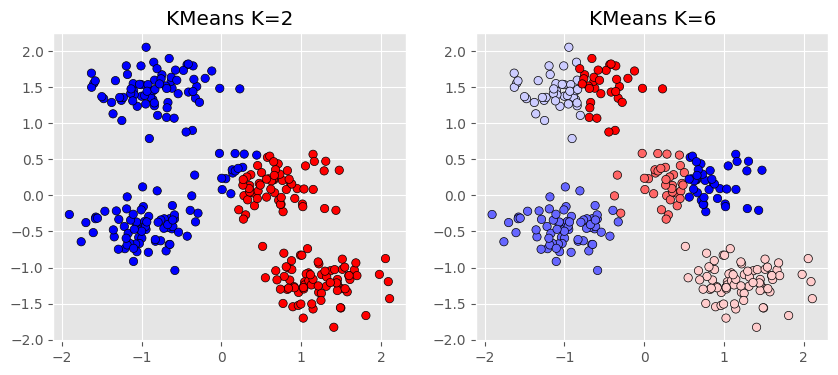

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Resultados para K = 2
# ==============================================================================
y_predict = KMeans(n_clusters=2, n_init=25, random_state=123).fit_predict(X=X_scaled)
ax[0].scatter(
        x = X_scaled[:, 0],
        y = X_scaled[:, 1], 
        c = y_predict,
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[0].set_title('KMeans K=2');

# Resultados para K = 6
# ==============================================================================
y_predict = KMeans(n_clusters=6, n_init=25, random_state=123).fit_predict(X=X_scaled)
ax[1].scatter(
        x = X_scaled[:, 0],
        y = X_scaled[:, 1], 
        c = y_predict,
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[1].set_title('KMeans K=6');

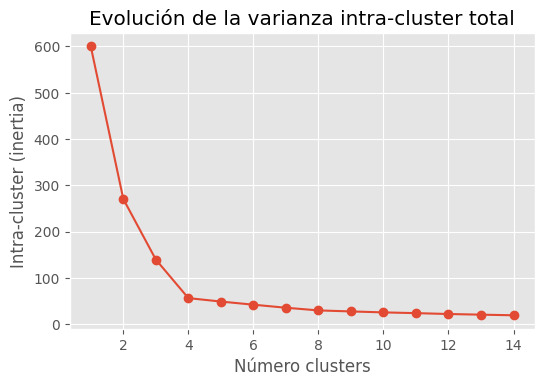

In [ ]:
# Método elbow para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    modelo_kmeans.fit(X_scaled)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

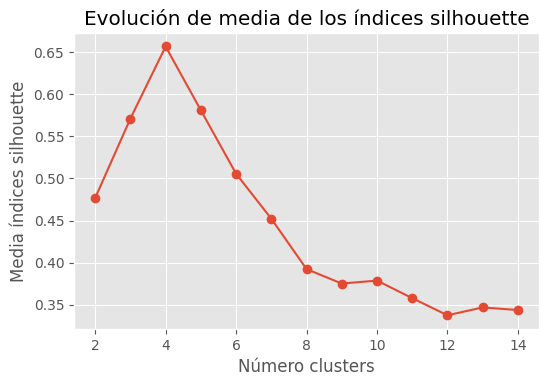

In [ ]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

## REGLAS DE ASOCIACIÓN

In [359]:
data_pura_reglas_asociacion = data_cruda
data_pura_reglas_asociacion

,Municipios,Producto,Cantidad,Año,cantidades_altas
0,Cali,Aguacate,458.0,2019,0
1,Cali,Banano,1097.0,2018,0
2,Cali,Bananito,519.0,2021,0
3,Cali,Borojó,539.0,2018,0
4,Cali,Cítricos,1215.0,2021,0
...,...,...,...,...,...
919,Zarzal,Papaya,1465.0,2018,0
920,Zarzal,Piña,905.0,2017,0
921,Zarzal,Pitaya,1319.0,2016,0
922,Zarzal,Tomate Arbol,648.0,2021,0


In [361]:
# Aplicar el algoritmo Apriori para encontrar conjuntos de elementos frecuentes
frequent_itemsets = apriori(data_pura_reglas_asociacion, min_support=0.1, use_colnames=True)

ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value Cali

 ## REDES NEURONALES

In [ ]:
data_pura_redes_neuronales = data_pura
data_pura_redes_neuronales.head(4)
data_pura_redes_neuronales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Municipios        924 non-null    object 
 1   Producto          924 non-null    object 
 2   Cantidad          924 non-null    float64
 3   Año               924 non-null    int64  
 4   cantidades_altas  924 non-null    int32  
 5   Cluster           924 non-null    int32  
 6   cluster           924 non-null    int32  
dtypes: float64(1), int32(3), int64(1), object(2)
memory usage: 39.8+ KB


In [ ]:
# Número de datos ausentes por variable
# ==============================================================================
data_pura_redes_neuronales.isna().sum().sort_values()

Municipios          0
Producto            0
Cantidad            0
Año                 0
cantidades_altas    0
Cluster             0
cluster             0
dtype: int64

Text(0.5, 0, 'Cantidad')

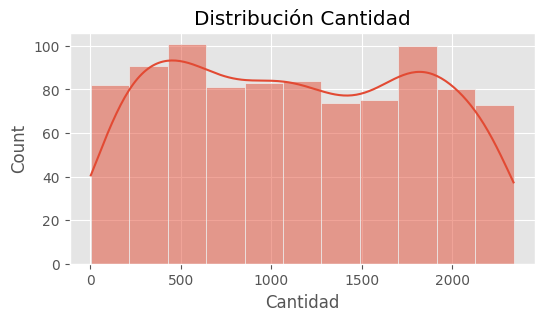

In [ ]:
# Distribución variable respuesta
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=data_pura_redes_neuronales, x='Cantidad', kde=True,ax=ax)
ax.set_title("Distribución Cantidad")
ax.set_xlabel('Cantidad')


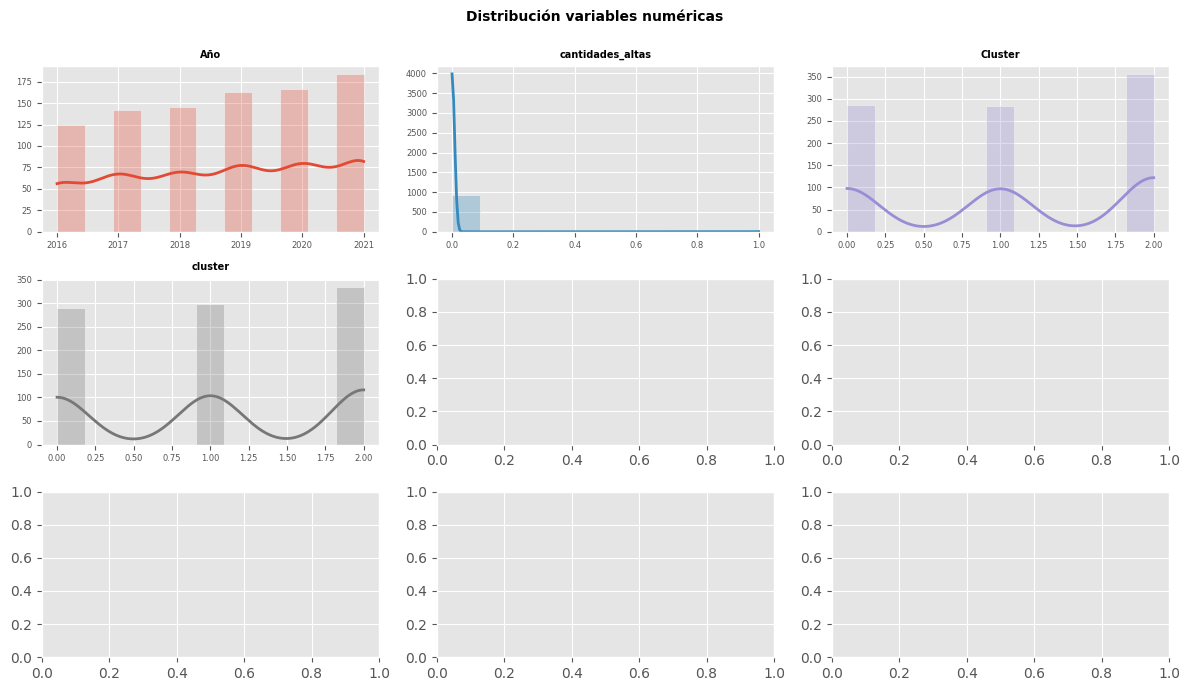

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 7))
axes = axes.flat
columnas_numeric = data_pura_redes_neuronales.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Cantidad')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = data_pura_redes_neuronales,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [ ]:
# Valores observados de Producto
# ==============================================================================
data_pura_redes_neuronales.Producto = data_pura_redes_neuronales.Producto.astype("str")
data_pura_redes_neuronales.Producto.value_counts()

Producto
Aguacate        42
Banano          42
Tomate Arbol    42
Pitaya          42
Piña            42
Papaya          42
Mora            42
Melón B         42
Melón A         42
Maracuyá        42
Mango           42
Lulo            42
Guayaba         42
Guanabana       42
Granadilla      42
Coco            42
Chontaduro      42
Curuba          42
Cítricos        42
Borojó          42
Bananito        42
Vid             42
Name: count, dtype: int64

In [ ]:
# Variables cualitativas (tipo object)
# ==============================================================================
data_pura_redes_neuronales.select_dtypes(include=['object']).describe()

,Municipios,Producto
count,924,924
unique,42,22
top,Cali,Aguacate
freq,22,42


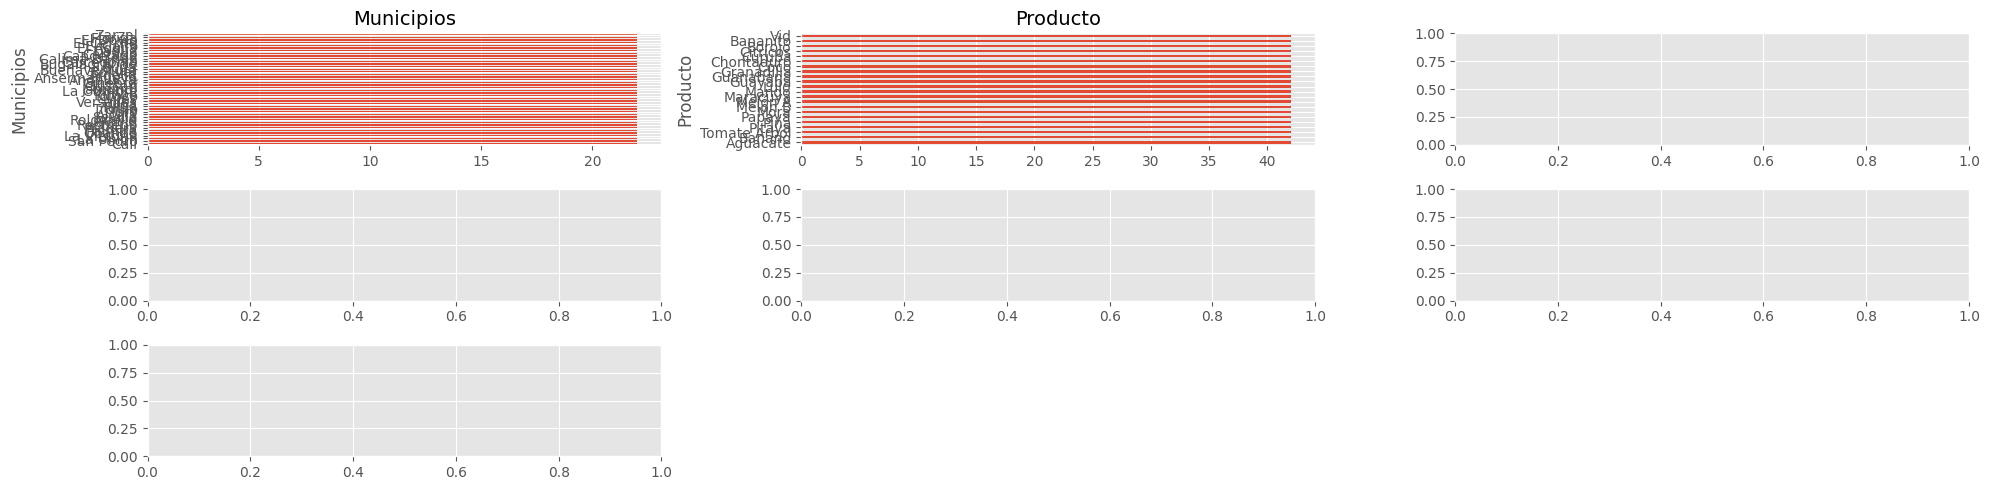

In [ ]:
# Gráfico para cada variable cualitativa
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 5))
axes = axes.flat
columnas_object = data_pura_redes_neuronales.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    data_pura_redes_neuronales[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 14)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                        data_pura_redes_neuronales.drop('Cantidad', axis = 'columns'),
                                        data_pura_redes_neuronales['Cantidad'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
print("Partición de entrenamento")
print("-----------------------")
display(y_train.describe())
display(X_train.describe())
display(X_train.describe(include = 'object'))
print(" ")

print("Partición de test")
print("-----------------------")
display(y_test.describe())
display(X_test.describe())
display(X_test.describe(include = 'object'))

Partición de entrenamento
-----------------------


count     739.000000
mean     1153.759134
std       666.971903
min        11.000000
25%       558.000000
50%      1139.000000
75%      1753.000000
max      2340.000000
Name: Cantidad, dtype: float64

,Año,cantidades_altas,Cluster,cluster
count,739.000000,739.0,739.000000,739.000000
mean,2018.691475,0.0,1.079838,1.043302
std,1.688337,0.0,0.828269,0.823614
min,2016.000000,0.0,0.000000,0.000000
25%,2017.000000,0.0,0.000000,0.000000
50%,2019.000000,0.0,1.000000,1.000000
75%,2020.000000,0.0,2.000000,2.000000
max,2021.000000,0.0,2.000000,2.000000


,Municipios,Producto
count,739,739
unique,42,22
top,Vijes,Borojó
freq,21,39


 
Partición de test
-----------------------


count     185.000000
mean     1117.870270
std       687.694126
min         2.000000
25%       503.000000
50%      1022.000000
75%      1708.000000
max      2330.000000
Name: Cantidad, dtype: float64

,Año,cantidades_altas,Cluster,cluster
count,185.000000,185.000000,185.000000,185.000000
mean,2018.789189,0.005405,1.064865,1.070270
std,1.726989,0.073521,0.838028,0.814563
min,2016.000000,0.000000,0.000000,0.000000
25%,2017.000000,0.000000,0.000000,0.000000
50%,2019.000000,0.000000,1.000000,1.000000
75%,2020.000000,0.000000,2.000000,2.000000
max,2021.000000,1.000000,2.000000,2.000000


,Municipios,Producto
count,185,185
unique,42,22
top,Cartago,Piña
freq,9,14


In [ ]:
# Selección de las variables por típo
# ==============================================================================
# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las 
# columnas cualitativas. Para mantener las columnas a las que no se les aplica 
# ninguna transformación se tiene que indicar remainder='passthrough'.

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

In [ ]:
set_config(display='diagram')
preprocessor
set_config(display='text')

# Se aprenden y aplican las transformaciones de preprocesado
# ==============================================================================
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [ ]:
# Convertir el output en dataframe y añadir el nombre de las columnas
# ==============================================================================
encoded_cat = preprocessor.named_transformers_['cat']['onehot']\
              .get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])
datos_train_prep = preprocessor.transform(X_train)
datos_train_prep = pd.DataFrame(datos_train_prep, columns=labels)
datos_train_prep.info()

AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names'

In [ ]:
# Pipeline de preprocedado y modelado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', MLPRegressor(solver = 'lbfgs', max_iter= 1000))])

In [ ]:
# Espacio de búsqueda de cada hiperparámetro
# ==============================================================================
param_distributions = {
    'modelo__hidden_layer_sizes': [(10), (20), (10, 10)],
    'modelo__alpha': np.logspace(-3, 3, 10),
    'modelo__learning_rate_init': [0.001, 0.01],
}

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 50,
        scoring    = 'neg_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 5, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

In [ ]:
# Error de test
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones,
        squared = False
       )
print('Error de test (rmse): ', rmse)

In [ ]:
modelo_final['modelo'].get_params()